<a href="https://colab.research.google.com/github/AliAbbas-12/AliAbbas-12/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction using Machine Learning**

# About the Dataset

There are 12 attributes in the data set:

1.   Area
2.   Bedrooms
1.   Bathrooms
2.   Stories
1.   Mainroad(Distance from mainroad)
2.   Guestroom
1.   Basement
2.   HotWater
1.   Air Conditioning
2.   Parking
1.   Prefarea(Preffered area)
2.   Furnishing Status















#**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# **Import CSV File as DataFrame**

In [ ]:
df = pd.read_csv("/content/Housing.csv")
X = df.iloc[:,1:13]
y = df.iloc[:,0]


In [ ]:
print(X)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

In [ ]:
print(y)

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64


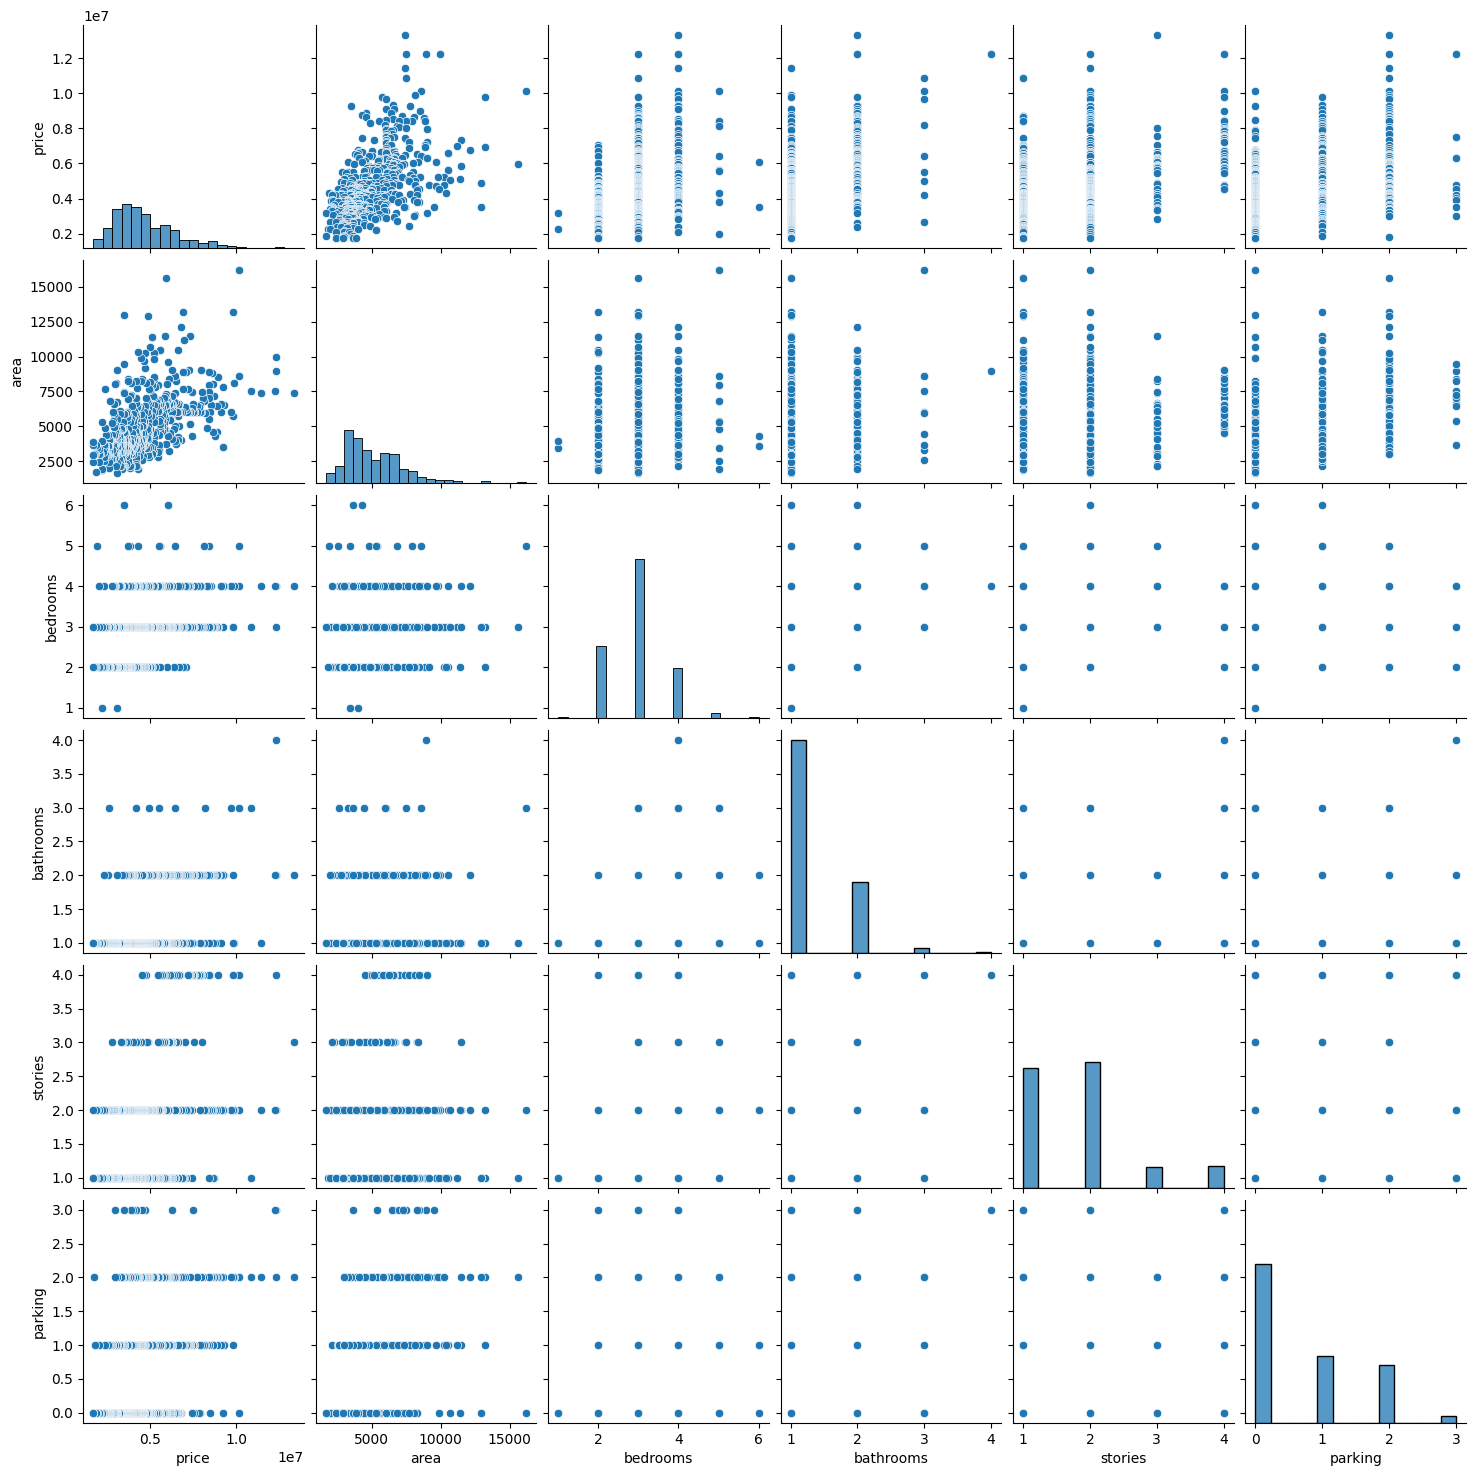

In [ ]:
sns.pairplot(df)

<ipython-input-5-f2f2d9d01b93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


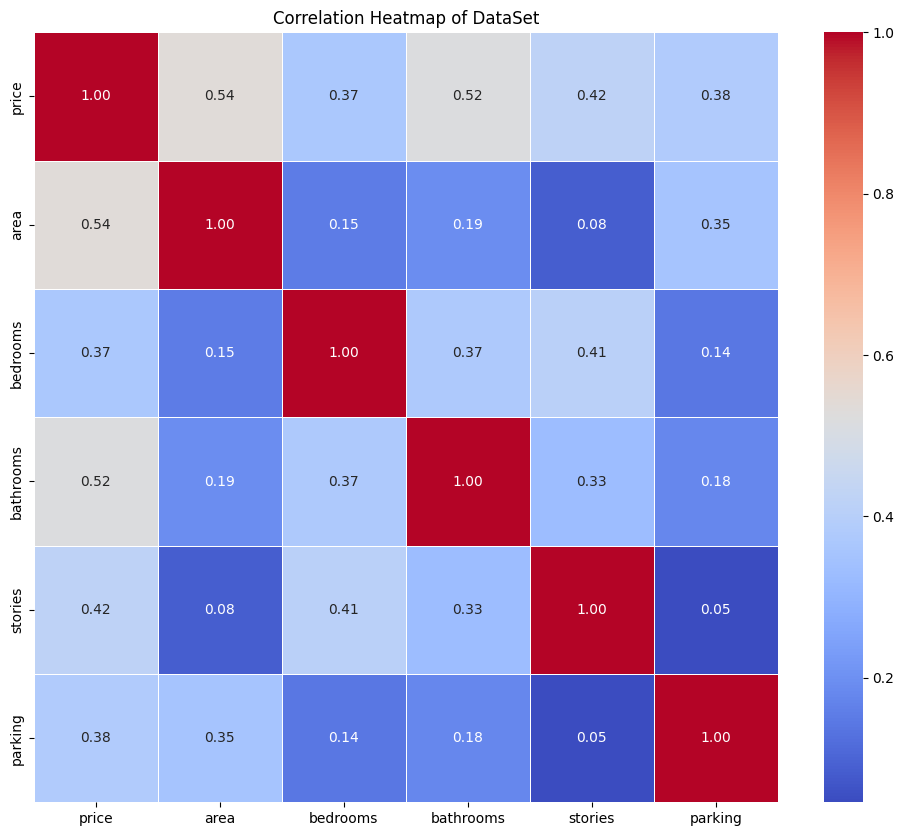

In [ ]:
#Heatmap of Dataset
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of DataSet')
plt.show()

# **Getting first 5 rows of Dataset**

In [ ]:
print(df.head)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#Converting these attributes to string data type, so that encoder recognizes the
X.iloc[:, 4:10] = X.iloc[:, 4:10].astype(str)
X['prefarea'] = X['prefarea'].astype(str)
X['furnishingstatus'] = X['furnishingstatus'].astype(str)

# **Preprocessing Data**

# **Encoding Categorical Data**

In [ ]:
#For column with non-binary values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [11])], remainder='passthrough')
X_encoded = ct.fit_transform(X)
dropcol = [12]
X = np.delete(X_encoded, dropcol, axis=1)
#After this, now X is a numpy array

In [ ]:
#For column with binary values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 4:10] = np.apply_along_axis(le.fit_transform, axis=0, arr=X[:, 4:10])
#in above line apply is used to separetely apply le on each colmn
X[:,10] = le.fit_transform(X[:,10])
print(X)

[[0.0 0.0 7420 ... 0 1 '2']
 [0.0 0.0 8960 ... 0 1 '3']
 [1.0 0.0 9960 ... 0 0 '2']
 ...
 [0.0 1.0 3620 ... 0 0 '0']
 [0.0 0.0 2910 ... 0 0 '0']
 [0.0 1.0 3850 ... 0 0 '0']]


# **Splitting of Data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#range 3-7
X_train[:,3:7] = sc.fit_transform(X_train[:,3:7])
X_test[:,3:7] = sc.transform(X_test[:,3:7])
#for the test set no fit method cause we need to use the same scale from training set
print(X_train[:,10])
print(X_test.dtype)

[0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1]
object


In [ ]:
print(X_train[:,11])

['2' '0' '0' '0' '0' '1' '0' '0' '1' '3' '1' '0' '0' '0' '0' '0' '0' '2'
 '1' '0' '1' '2' '1' '0' '0' '2' '1' '1' '0' '2' '2' '2' '2' '2' '1' '1'
 '0' '0' '0' '1' '1' '0' '0' '0' '0' '2' '0' '0' '0' '0' '0' '0' '0' '1'
 '1' '2' '0' '3' '0' '1' '0' '1' '2' '0' '1' '0' '0' '1' '2' '0' '0' '0'
 '2' '1' '0' '0' '2' '1' '0' '1' '1' '2' '1' '1' '0' '1' '0' '0' '1' '2'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '3' '1' '1' '2' '0' '0' '1' '0'
 '0' '1' '0' '2' '0' '2' '2' '0' '0' '0' '2' '0' '0' '0' '0' '2' '1' '2'
 '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '2' '3' '0'
 '0' '2' '0' '0' '0' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '1' '1' '0'
 '1' '0' '1' '0' '3' '0' '2' '3' '0' '1' '0' '0' '0' '2' '0' '0' '0' '2'
 '1' '0' '0' '2' '1' '0' '2' '0' '1' '1' '2' '0' '2' '1' '2' '0' '0' '1'
 '2' '2' '1' '0' '0' '0' '0' '2' '2' '0' '0' '1' '0' '0' '0' '0' '1' '0'
 '1' '1' '2' '3' '2' '0' '1' '0' '2' '0' '0' '0' '0

# **Model Training**
We will implement various models and test for their accuracy to determine the best model for the data.

# **Linear Regression**

In [ ]:
#Linear Regresion Model
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)
LR_pred = LR_model.predict(X_test)



# **Support Vector Machine**

In [ ]:
#Support Vector Machine
from sklearn import svm
SVM_model = svm.SVR()
SVM_model.fit(X_train,y_train)
SVM_pred = SVM_model.predict(X_test)



# **Gradient Boosting Regressor**

In [ ]:
#Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
GBR_model.fit(X_train,y_train)
GBR_pred = GBR_model.predict(X_test)

# **Model Evaluation**

# Calculating the Performance Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error
#Evalating Linear Regresion Model
print("Model Evalation of Linear Regression Model")
print("The Mean Absolute Error = ",mean_absolute_error(y_test,LR_pred))
print("The Mean Squared Error = ",mean_squared_error(y_test, LR_pred))
print("The Mean Absolute Percentage Error = ",mean_absolute_percentage_error(y_test, LR_pred))


Model Evalation of Linear Regression Model
The Mean Absolute Error =  939530.7428690703
The Mean Squared Error =  1697159695162.0645
The Mean Absolute Percentage Error =  0.21619179789447818


In [ ]:
#Evaluating Support Vector Machine
print("Model Evalation of Support Vector Machine")
print("The Mean Absolute Error = ",mean_absolute_error(y_test, SVM_pred))
print("The Mean Squared Error = ",mean_squared_error(y_test, SVM_pred))
print("The Mean Absolute Percentage Error = ",mean_absolute_percentage_error(y_test, SVM_pred))

Model Evalation of Support Vector Machine
The Mean Absolute Error =  1496569.2746393671
The Mean Squared Error =  4374315654152.384
The Mean Absolute Percentage Error =  0.32380559110782653


In [ ]:
#Evaluating Gradient Boost Regressor
print("Model Evalation of Gradient Boost Regressor")
print("The Mean Absolute Error = ",mean_absolute_error(y_test, GBR_pred))
print("The Mean Squared Error = ",mean_squared_error(y_test, GBR_pred))
print("The Mean Absolute Percentage Error = ",mean_absolute_percentage_error(y_test, GBR_pred))

Model Evalation of Gradient Boost Regressor
The Mean Absolute Error =  872535.3564272232
The Mean Squared Error =  1518177990419.6345
The Mean Absolute Percentage Error =  0.19858535443257183


# **Actual Price vs Predicted Price**

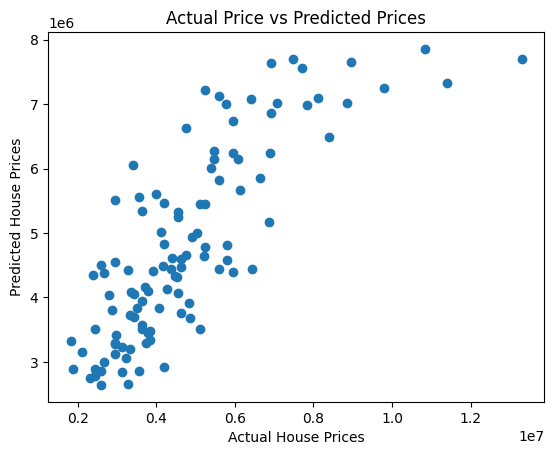

In [ ]:
plt.scatter(y_test,GBR_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()


# We can conclude that the Gradient Boost Model is the most accurate for predicting House Prices